In [1]:
import json
from pprint import pprint
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import importlib
import sys
sys.path.insert(0, '../utils')
import data_utils
import visualization
import evaluation

# importlib.reload(visualization)

sys.path.insert(0, '../models')
import log_reg_word_embeddings

In [3]:
np.random.seed(42)

In [4]:
df_train = data_utils.load_data_set('../data/train/train.csv')
df_train_x = df_train[['head.word', 'tail.word', 'sentence']]
df_train_y = df_train['relation']

In [5]:
df_test = data_utils.load_data_set('../data/test/test.csv')
df_test_x = df_test[['head.word', 'tail.word', 'sentence']]
df_test_y = df_test['relation']

In [6]:
df_full = df_train.append(df_test)

In [141]:
df_full['head_word']

(694194, 4)

In [151]:
from collections import Counter

entity_vocabulary = Counter()
df_full['head.word'].str.lower().str.split().apply(entity_vocabulary.update)
df_full['tail.word'].str.lower().str.split().apply(entity_vocabulary.update)
print('Entity vocabulary size: {}'.format(len(entity_vocabulary)))

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
172418    None
172419    None
172420    None
172421    None
172422    None
172423    None
172424    None
172425    None
172426    None
172427    None
172428    None
172429    None
172430    None
172431    None
172432    None
172433    None
172434    None
172435    None
172436    None
172437    None
172438    None
172439    None
172440    None
172441    None
172442    None
172443    None
172444    None
172445    None
172446    None
172447    None
Name: head.word, Length: 694194, dtype: object

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
172418    None
172419    None
172420    None
172421    None
172422    None
172423    None
172424    None
172425    None
172426    None
172427    None
172428    None
172429    None
172430    None
172431    None
172432    None
172433    None
172434    None
172435    None
172436    None
172437    None
172438    None
172439    None
172440    None
172441    None
172442    None
172443    None
172444    None
172445    None
172446    None
172447    None
Name: tail.word, Length: 694194, dtype: object

Entity vocabulary size: 40477


In [7]:
with open('../data/classes.json') as f:
    classes_json = json.load(f)
classes = np.asarray(list(classes_json.keys()))

In [8]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', np.unique(df_train_y), df_train_y)
class_weights_dict = dict(enumerate(class_weights))
class_weights_dict

{0: 1932.414814814815,
 1: 19.302700702922678,
 2: 53.02357723577236,
 3: 26.839094650205762,
 4: 8695.866666666667,
 5: 2.370737913486005,
 6: 966.2074074074075,
 7: 966.2074074074075,
 8: 2.387007045475341,
 9: 4347.933333333333,
 10: 2.387007045475341,
 11: 1.9578670869451011,
 12: 0.2606635591992526,
 13: 1.875119496855346,
 14: 445.94188034188033,
 15: 158.10666666666665,
 16: 21.794152046783626,
 17: 724.6555555555556,
 18: 7.180732177263969,
 19: 202.22945736434107,
 20: 27.960986066452303,
 21: 117.51171171171171,
 22: 1.7872503682389613,
 23: 1.9530301328841475,
 24: 4.291076568796776,
 25: 86.09768976897689,
 26: 724.6555555555556,
 27: 59.15555555555556,
 28: 4347.933333333333,
 29: 0.04510596727830729}

In [148]:
from nltk.tokenize import RegexpTokenizer
space_tokenizer = RegexpTokenizer(r'\w+')
tokenized = df_train_x['sentence'].append(df_test_x['sentence']).apply(space_tokenizer.tokenize)
tokenized_lengths = tokenized.apply(len)

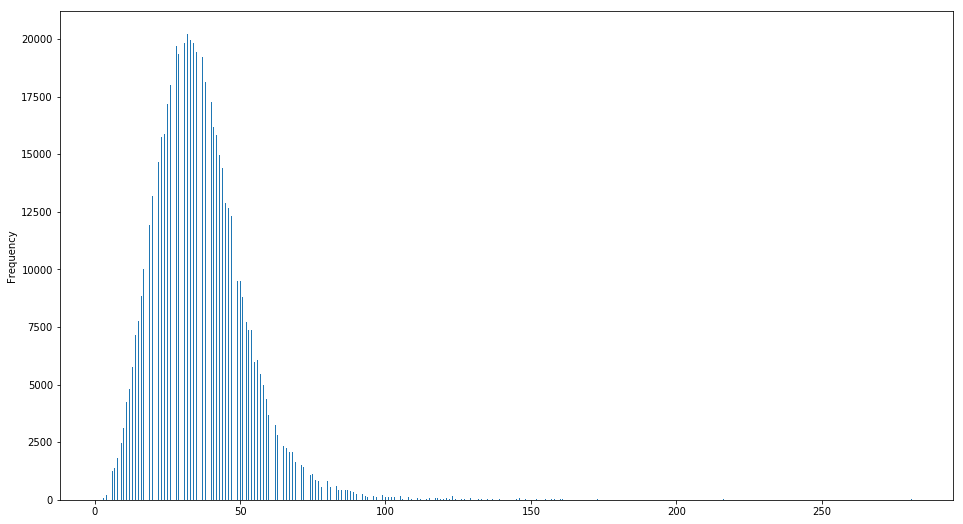

In [18]:
plt.rcParams['figure.figsize'] = (16, 9)
tokenized_lengths.plot.hist(bins=1000)

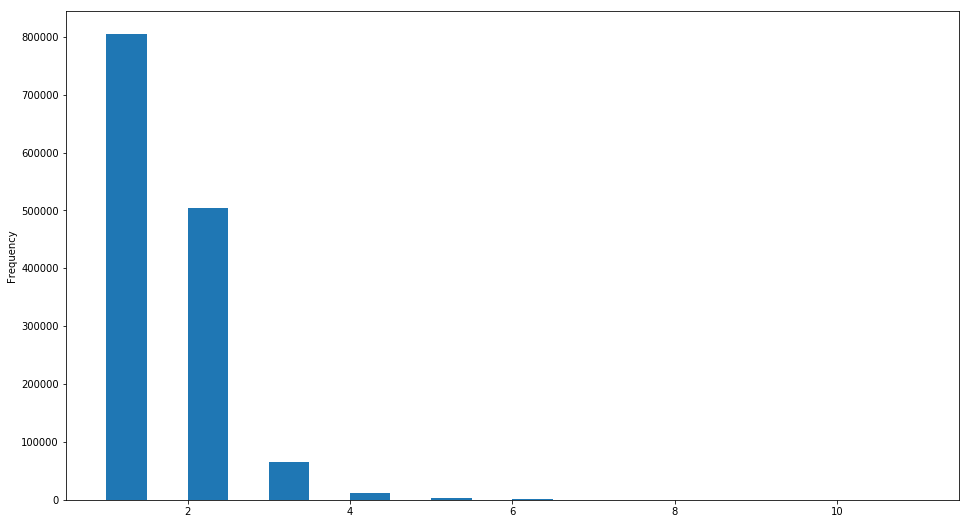

In [150]:
tokenized_entities = df_full['head.word'].append(df_full['tail.word']).apply(space_tokenizer.tokenize)
tokenized_entities_lengths = tokenized_entities.apply(len)
plt.rcParams['figure.figsize'] = (16, 9)
tokenized_entities_lengths.plot.hist(bins=20)

In [16]:
from collections import Counter

vocabulary = Counter()
df_train_x['sentence'].str.lower().str.split().apply(vocabulary.update)
df_test_x['sentence'].str.lower().str.split().apply(vocabulary.update)

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
522581    None
522582    None
522583    None
522584    None
522585    None
522586    None
522587    None
522588    None
522589    None
522590    None
522591    None
522592    None
522593    None
522594    None
522595    None
522596    None
522597    None
522598    None
522599    None
522600    None
522601    None
522602    None
522603    None
522604    None
522605    None
522606    None
522607    None
522608    None
522609    None
522610    None
Name: sentence, Length: 521752, dtype: object

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
172418    None
172419    None
172420    None
172421    None
172422    None
172423    None
172424    None
172425    None
172426    None
172427    None
172428    None
172429    None
172430    None
172431    None
172432    None
172433    None
172434    None
172435    None
172436    None
172437    None
172438    None
172439    None
172440    None
172441    None
172442    None
172443    None
172444    None
172445    None
172446    None
172447    None
Name: sentence, Length: 172442, dtype: object

In [19]:
len(vocabulary)

185328

In [9]:
MAX_WORDS = 150000
MAX_SEQUENCE_LENGTH = 100
EMBEDDING_DIM = 100

MAX_ENTITY_WORDS = 40000
MAX_ENTITY_LENGTH = 4
ENTITY_EMBEDDING_DIM = 100

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [11]:
tokenizer = Tokenizer(num_words=MAX_WORDS)
tokenizer.fit_on_texts(df_train_x['sentence'].append(df_test_x['sentence']))
# tokenizer.word_index

In [12]:
word_index = tokenizer.word_index

In [13]:
entity_tokenizer = Tokenizer(num_words=MAX_ENTITY_WORDS)
entity_tokenizer.fit_on_texts(df_full['head.word'].append(df_full['tail.word']))

In [14]:
entity_word_index = entity_tokenizer.word_index

In [159]:
len(entity_word_index)

40124

In [15]:
# load GloVe 100 dim word embeddings
embeddings_index = {}
f = open('../data/external/glove.6B.100d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index))

Found 400000 word vectors.


In [16]:
# use word_index and embeddings_index to construct embedding_matrix
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [17]:
embedding_matrix.shape

(147420, 100)

In [18]:
# use entity_word_index and embeddings_index to construct entity_embedding_matrix
entity_embedding_matrix = np.zeros((len(entity_word_index) + 1, ENTITY_EMBEDDING_DIM))
for word, i in entity_word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        entity_embedding_matrix[i] = embedding_vector

In [19]:
entity_embedding_matrix.shape

(40125, 100)

In [20]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, concatenate


# head
head_input = Input(shape=(MAX_ENTITY_LENGTH,))
head_embedding = Embedding(len(entity_word_index) + 1,
                           ENTITY_EMBEDDING_DIM,
                           weights=[entity_embedding_matrix],
                           input_length=MAX_ENTITY_LENGTH,
                           trainable=False)(head_input)
head_conv1 = Conv1D(128, 2, activation='relu')(head_embedding)
head_pool1 = MaxPooling1D(2)(head_conv1)
head_dropout1 = Dropout(0.25)(head_pool1)

# head_conv2 = Conv1D(128, 5, activation='relu')(head_dropout1)
# head_pool2 = MaxPooling1D(35)(head_conv2)
# head_dropout2 = Dropout(0.25)(head_pool2)

head_flat = Flatten()(head_dropout1)

# tail
tail_input = Input(shape=(MAX_ENTITY_LENGTH,))
tail_embedding = Embedding(len(entity_word_index) + 1,
                           ENTITY_EMBEDDING_DIM,
                           weights=[entity_embedding_matrix],
                           input_length=MAX_ENTITY_LENGTH,
                           trainable=False)(tail_input)
tail_conv1 = Conv1D(128, 2, activation='relu')(tail_embedding)
tail_pool1 = MaxPooling1D(2)(tail_conv1)
tail_dropout1 = Dropout(0.25)(tail_pool1)

# tail_conv2 = Conv1D(128, 5, activation='relu')(tail_dropout1)
# tail_pool2 = MaxPooling1D(35)(tail_conv2)
# tail_dropout2 = Dropout(0.25)(tail_pool2)

tail_flat = Flatten()(tail_dropout1)

#sentence

sentence_input = Input(shape=(MAX_SEQUENCE_LENGTH,))
sentence_embedding = Embedding(len(word_index) + 1,
                               EMBEDDING_DIM,
                               weights=[embedding_matrix],
                               input_length=MAX_SEQUENCE_LENGTH,
                               trainable=False)(sentence_input)
sentence_conv1 = Conv1D(128, 5, activation='relu')(sentence_embedding)
sentence_pool1 = MaxPooling1D(5)(sentence_conv1)
sentence_dropout1 = Dropout(0.25)(sentence_pool1)

sentence_conv2 = Conv1D(128, 5, activation='relu')(sentence_dropout1)
sentence_pool2 = MaxPooling1D(5)(sentence_conv2)
sentence_dropout2 = Dropout(0.25)(sentence_pool2)

sentence_flat = Flatten()(sentence_dropout2)

# combined model

merge = concatenate([head_flat, tail_flat, sentence_flat])
hidden1 = Dense(128, activation='relu')(merge)
dropout = Dropout(0.2)(hidden1)
hidden2 = Dense(64, activation='relu')(dropout)
output = Dense(len(classes), activation='softmax')(hidden2)

model = Model(inputs=[head_input, tail_input, sentence_input],
              outputs=output)

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 100, 100)     14742000    input_3[0][0]                    
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 96, 128)      64128       embedding_2[0][0]                
__________________________________________________________________________________________________
input_1 (InputLayer)            (None, 4)            0                                            
__________________________________________________________________________________________________
input_2 (I

In [216]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')

# from IPython.display import SVG
# from tensorflow.keras.utils import model_to_dot

# SVG(model_to_dot(model).create(prog='dot', format='svg'))


ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [21]:
train_sequences = tokenizer.texts_to_sequences(df_train_x['sentence'])

In [22]:
padded_train_sequences = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [23]:
padded_train_head = pad_sequences(entity_tokenizer.texts_to_sequences(df_train_x['head.word']), maxlen=MAX_ENTITY_LENGTH)
padded_train_tail = pad_sequences(entity_tokenizer.texts_to_sequences(df_train_x['tail.word']), maxlen=MAX_ENTITY_LENGTH)

In [24]:
# from tensorflow.keras.utils import to_categorical
# labels = to_categorical(classes)

from sklearn.preprocessing import OneHotEncoder

label_encoder = OneHotEncoder()
label_encoder.fit(classes.reshape(-1, 1))

labels = label_encoder.transform(df_train_y.values.reshape(-1, 1)).todense()

OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [26]:
print('Shape of data tensor:', padded_train_sequences.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (521752, 100)
Shape of label tensor: (521752, 30)


In [28]:
history = model.fit(
    [padded_train_head, padded_train_tail, padded_train_sequences],
    np.asarray(labels),
    epochs=150,
    batch_size=500,
    class_weight=class_weights_dict,
    validation_split=0.2
)

Train on 417401 samples, validate on 104351 samples
Epoch 1/150
417401/417401 [==============================] - 190s 454us/step - loss: 1.6357 - acc: 0.1483 - val_loss: 2.5464 - val_acc: 0.1162
Epoch 2/150
417401/417401 [==============================] - 189s 453us/step - loss: 1.1699 - acc: 0.1931 - val_loss: 2.5820 - val_acc: 0.1552
Epoch 3/150
417401/417401 [==============================] - 192s 460us/step - loss: 0.9516 - acc: 0.2463 - val_loss: 2.6683 - val_acc: 0.1368
Epoch 4/150
417401/417401 [==============================] - 217s 520us/step - loss: 0.8738 - acc: 0.2774 - val_loss: 2.2478 - val_acc: 0.2301
Epoch 5/150
417401/417401 [==============================] - 203s 485us/step - loss: 0.7923 - acc: 0.3057 - val_loss: 2.3037 - val_acc: 0.2374
Epoch 6/150
417401/417401 [==============================] - 189s 453us/step - loss: 0.7423 - acc: 0.3173 - val_loss: 2.1761 - val_acc: 0.2782
Epoch 7/150
417401/417401 [==============================] - 189s 453us/step - loss: 0.720

417401/417401 [==============================] - 182s 436us/step - loss: 0.5317 - acc: 0.4995 - val_loss: 1.8904 - val_acc: 0.4876
Epoch 58/150
417401/417401 [==============================] - 182s 436us/step - loss: 0.5805 - acc: 0.4903 - val_loss: 1.9646 - val_acc: 0.4816
Epoch 59/150
417401/417401 [==============================] - 182s 436us/step - loss: 0.5370 - acc: 0.4989 - val_loss: 1.9525 - val_acc: 0.4787
Epoch 60/150
417401/417401 [==============================] - 182s 436us/step - loss: 0.4995 - acc: 0.4980 - val_loss: 1.8937 - val_acc: 0.4968
Epoch 61/150
417401/417401 [==============================] - 183s 438us/step - loss: 0.5430 - acc: 0.4940 - val_loss: 1.8713 - val_acc: 0.4841
Epoch 62/150
417401/417401 [==============================] - 182s 436us/step - loss: 0.5249 - acc: 0.5010 - val_loss: 1.8229 - val_acc: 0.5018
Epoch 63/150
417401/417401 [==============================] - 182s 436us/step - loss: 0.5267 - acc: 0.5012 - val_loss: 1.9429 - val_acc: 0.4806
Epoch

417401/417401 [==============================] - 184s 441us/step - loss: 0.5777 - acc: 0.5013 - val_loss: 1.9630 - val_acc: 0.4899
Epoch 114/150
417401/417401 [==============================] - 184s 440us/step - loss: 0.5826 - acc: 0.4988 - val_loss: 1.8973 - val_acc: 0.5065
Epoch 115/150
417401/417401 [==============================] - 184s 440us/step - loss: 0.5635 - acc: 0.4934 - val_loss: 1.8867 - val_acc: 0.4973
Epoch 116/150
417401/417401 [==============================] - 184s 440us/step - loss: 0.6016 - acc: 0.4963 - val_loss: 2.1212 - val_acc: 0.4561
Epoch 117/150
417401/417401 [==============================] - 184s 440us/step - loss: 0.5798 - acc: 0.4962 - val_loss: 1.9253 - val_acc: 0.4812
Epoch 118/150
417401/417401 [==============================] - 184s 440us/step - loss: 0.6561 - acc: 0.4888 - val_loss: 2.1530 - val_acc: 0.4315
Epoch 119/150
417401/417401 [==============================] - 183s 439us/step - loss: 0.6361 - acc: 0.4710 - val_loss: 1.9579 - val_acc: 0.4893

In [29]:
model.save('../trained_models/cnn_word_embeddings_all_100_class_weights.h5')

In [30]:
test_sequences = tokenizer.texts_to_sequences(df_test_x['sentence'])
padded_test_sequences = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [31]:
padded_test_head = pad_sequences(entity_tokenizer.texts_to_sequences(df_test_x['head.word']), maxlen=MAX_ENTITY_LENGTH)
padded_test_tail = pad_sequences(entity_tokenizer.texts_to_sequences(df_test_x['tail.word']), maxlen=MAX_ENTITY_LENGTH)

In [32]:
test_labels = label_encoder.transform(df_test_y.values.reshape(-1, 1)).todense()

In [32]:
scores = model.evaluate([padded_test_head, padded_test_tail, padded_test_sequences], test_labels)

172442/172442 [==============================] - 29s 168us/step


In [33]:
scores

[0.2966721483257834, 0.9060031778800988]

In [33]:
predictions = model.predict([padded_test_head, padded_test_tail, padded_test_sequences])

In [34]:
predicted_labels = label_encoder.inverse_transform(predictions).ravel()

In [35]:
from collections import Counter
Counter(predicted_labels)

gold_labels = df_test_y

Counter(gold_labels)

Counter({'/people/person/place_lived': 6121,
         '/people/deceased_person/place_of_death': 2376,
         '/location/location/contains': 21946,
         '/people/person/nationality': 3488,
         '/people/person/ethnicity': 484,
         'NA': 71248,
         '/people/person/place_of_birth': 5768,
         '/business/person/company': 4780,
         '/location/administrative_division/country': 13939,
         '/business/company/founders': 2286,
         '/location/neighborhood/neighborhood_of': 5151,
         '/business/company/place_founded': 4613,
         '/location/country/administrative_divisions': 5134,
         '/location/country/capital': 10751,
         '/sports/sports_team/location': 1540,
         '/people/ethnicity/geographic_distribution': 793,
         '/location/us_county/county_seat': 929,
         '/location/us_state/capital': 4486,
         '/people/person/religion': 567,
         '/people/person/children': 5284,
         '/business/company/major_shareholders': 

Counter({'/people/person/place_of_birth': 162,
         '/people/person/nationality': 723,
         '/people/person/place_lived': 450,
         '/location/location/contains': 2793,
         '/sports/sports_team/location': 10,
         '/business/person/company': 302,
         '/location/country/capital': 553,
         '/business/company/founders': 95,
         '/film/film/featured_film_locations': 2,
         '/location/administrative_division/country': 424,
         '/location/us_county/county_seat': 23,
         '/people/deceased_person/place_of_death': 68,
         '/business/company/place_founded': 20,
         '/location/neighborhood/neighborhood_of': 68,
         '/people/person/children': 30,
         '/film/film_location/featured_in_films': 2,
         '/people/ethnicity/geographic_distribution': 136,
         '/location/country/administrative_divisions': 424,
         '/location/us_state/capital': 39,
         '/business/company_advisor/companies_advised': 8,
         '/time/e

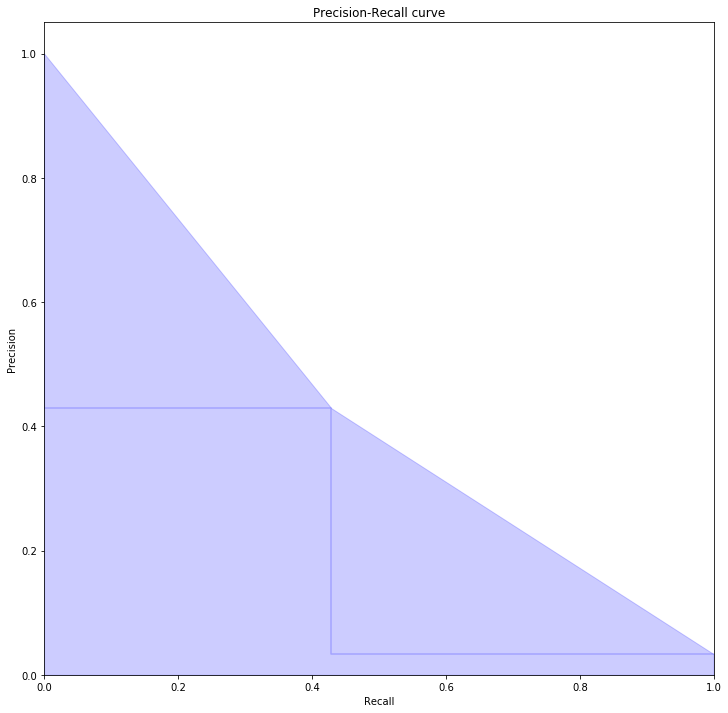

<module 'matplotlib.pyplot' from '/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/matplotlib/pyplot.py'>

In [36]:
# Precision-Recall Curve
precision, recall, threshold = evaluation.compute_precision_recall_curve(
    y_true=df_test_y.values.reshape(-1, 1),
    y_pred=predicted_labels.reshape(-1, 1),
    classes=classes.reshape(-1, 1)
)

plt.rcParams["figure.figsize"] = (12, 12)
visualization.plot_precision_recall_curve(precision, recall)

In [37]:
score = evaluation.compute_score(predicted_labels, gold_labels, labels=classes)

/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/tony/source/relation-extraction/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cnf_matrix = confusion_matrix(
    y_true=gold_labels,
    y_pred=predicted_labels,
    labels=classes
)
cnf_matrix

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     8,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0],
       [    0,    42,     1,     4,     0,     4,     0,     0,     0,
            0,     0,     0,    14,     0,     0,     0,     0,     0,
            1,     0,     2,     0,     0,     0,     0,     0,     0,
            0,     0,    27],
       [    0,    15,    23,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     8],
       [    0,     0,     0,     7,     0,     0,     0,     0,     2,
            0,     0,     0,     1,     5,     0,     0,     0,     0,
            0,     0,     0,     1,     0,     1,     0,     0,     0,
            1,     0,     2],
       [    0,     0,     0,

In [39]:
def get_results(name, config, score, cnf_matrix, history):
    return {
        'name': name,
        'config': config,
        'score': score,
        'confusion_matrix': cnf_matrix.tolist(),
        'history': history.history,
        'params': history.params
    }

import datetime
import time

def persist_results(results):    
    timestamp = datetime.datetime.fromtimestamp(time.time()).strftime('%Y-%m-%d-%H-%M-%S')
    with open('../results/{}-{}.json'.format(timestamp, results['name']), 'w') as f:
        json.dump(results, f)


config = {
    'MAX_WORDS': MAX_WORDS,
    'MAX_SEQUENCE_LENGTH': MAX_SEQUENCE_LENGTH,
    'EMBEDDING_DIM': EMBEDDING_DIM,
    'MAX_ENTITY_WORDS': MAX_ENTITY_WORDS,
    'MAX_ENTITY_LENGTH': MAX_ENTITY_LENGTH,
    'ENTITY_EMBEDDING_DIM': ENTITY_EMBEDDING_DIM
}


results = get_results('cnn_word_embeddings_all', config, score, cnf_matrix, history)
results
persist_results(results)

{'name': 'cnn_word_embeddings_all',
 'config': {'MAX_WORDS': 150000,
  'MAX_SEQUENCE_LENGTH': 100,
  'EMBEDDING_DIM': 100,
  'MAX_ENTITY_WORDS': 40000,
  'MAX_ENTITY_LENGTH': 4,
  'ENTITY_EMBEDDING_DIM': 100},
 'score': {'accuracy': 0.42910079910926574,
  'precision': 0.9595035821014407,
  'recall': 0.42910079910926574,
  'f1': 0.5786410134859821},
 'confusion_matrix': [[0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   8,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [0,
   42,
   1,
   4,
   0,
   4,
   0,
   0,
   0,
   0,
   0,
   0,
   14,
   0,
   0,
   0,
   0,
   0,
   1,
   0,
   2,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   27],
  [0,
   15,
   23,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   8],
  [0,
   0,
   0,
   7,
   0,
   0,
   0,
   0,
   2,
   0,
   0,
   0,
   1,
   

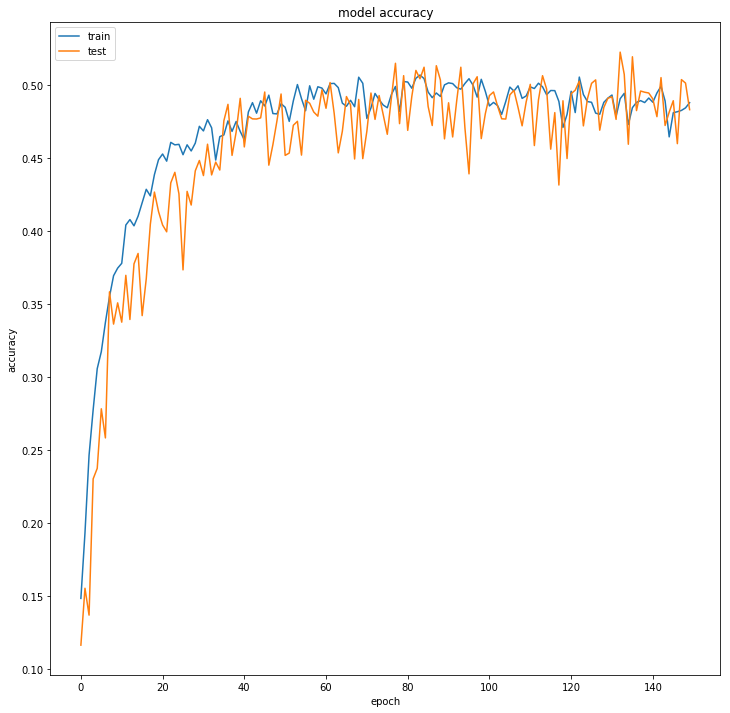

In [40]:
def visualize_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    return plt

visualize_history(history).show()

In [41]:
history.params

{'batch_size': 500,
 'epochs': 150,
 'steps': None,
 'samples': 417401,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc'],
 'validation_steps': None}

Confusion matrix, without normalization
[[    0     0     0     0     0     0     0     0     0     0     0     0
      8     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0]
 [    0    42     1     4     0     4     0     0     0     0     0     0
     14     0     0     0     0     0     1     0     2     0     0     0
      0     0     0     0     0    27]
 [    0    15    23     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     8]
 [    0     0     0     7     0     0     0     0     2     0     0     0
      1     5     0     0     0     0     0     0     0     1     0     1
      0     0     0     1     0     2]
 [    0     0     0     0     0     7     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     1
      0     0     0     0     0     0]
 [    0     0     0     1

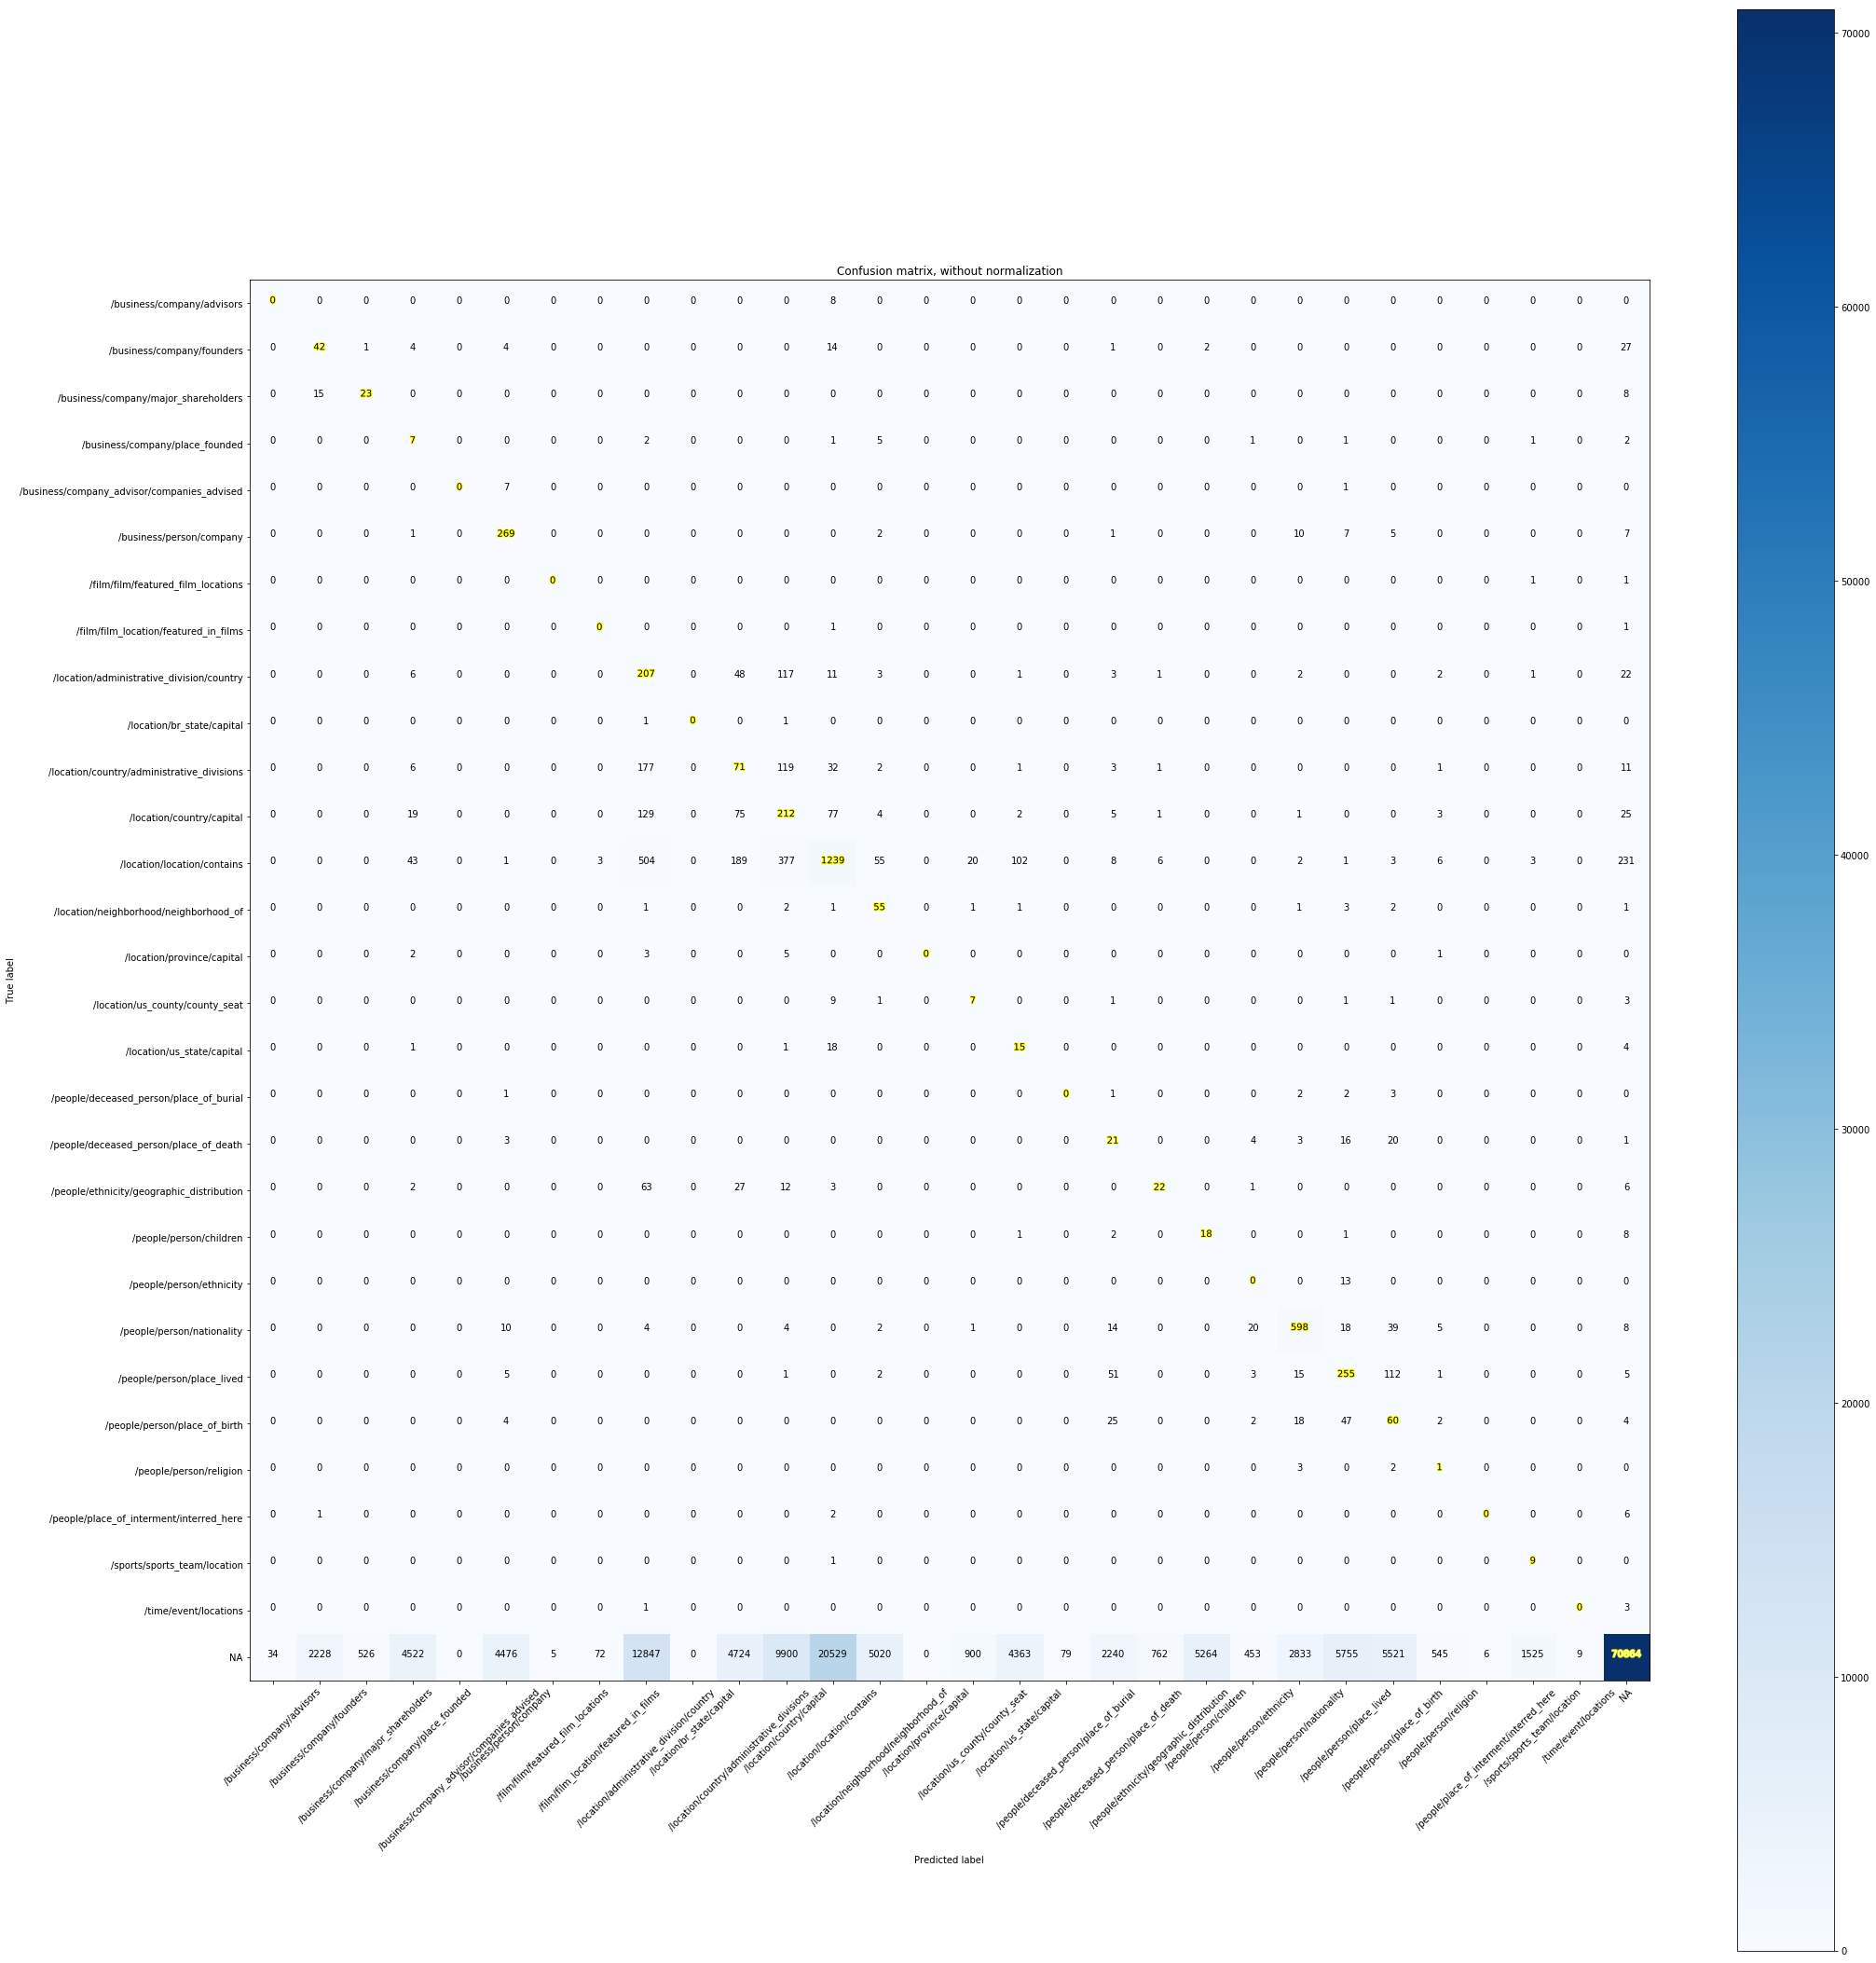

Normalized confusion matrix
[[0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 1.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00]
 [0.0e+00 4.4e-01 1.1e-02 4.2e-02 0.0e+00 4.2e-02 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 1.5e-01 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  1.1e-02 0.0e+00 2.1e-02 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 2.8e-01]
 [0.0e+00 3.3e-01 5.0e-01 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 1.7e-01]
 [0.0e+00 0.0e+00 0.0e+00 3.5e-01 0.0e+00 0.0e+00 0.0e+00 0.0e+00 1.0e-01
  0.0e+00 0.0e+00 0.0e+00 5.0e-02 2.5e-01 0.0e+00 0.0e+00 0.0e+00 0.0e+00
  0.0e+00 0.0e+00 0.0e+00 5.0e-02 0.0e+00 5.0e-02 0.0e+00 0.0e+00 0.0e+00
  5

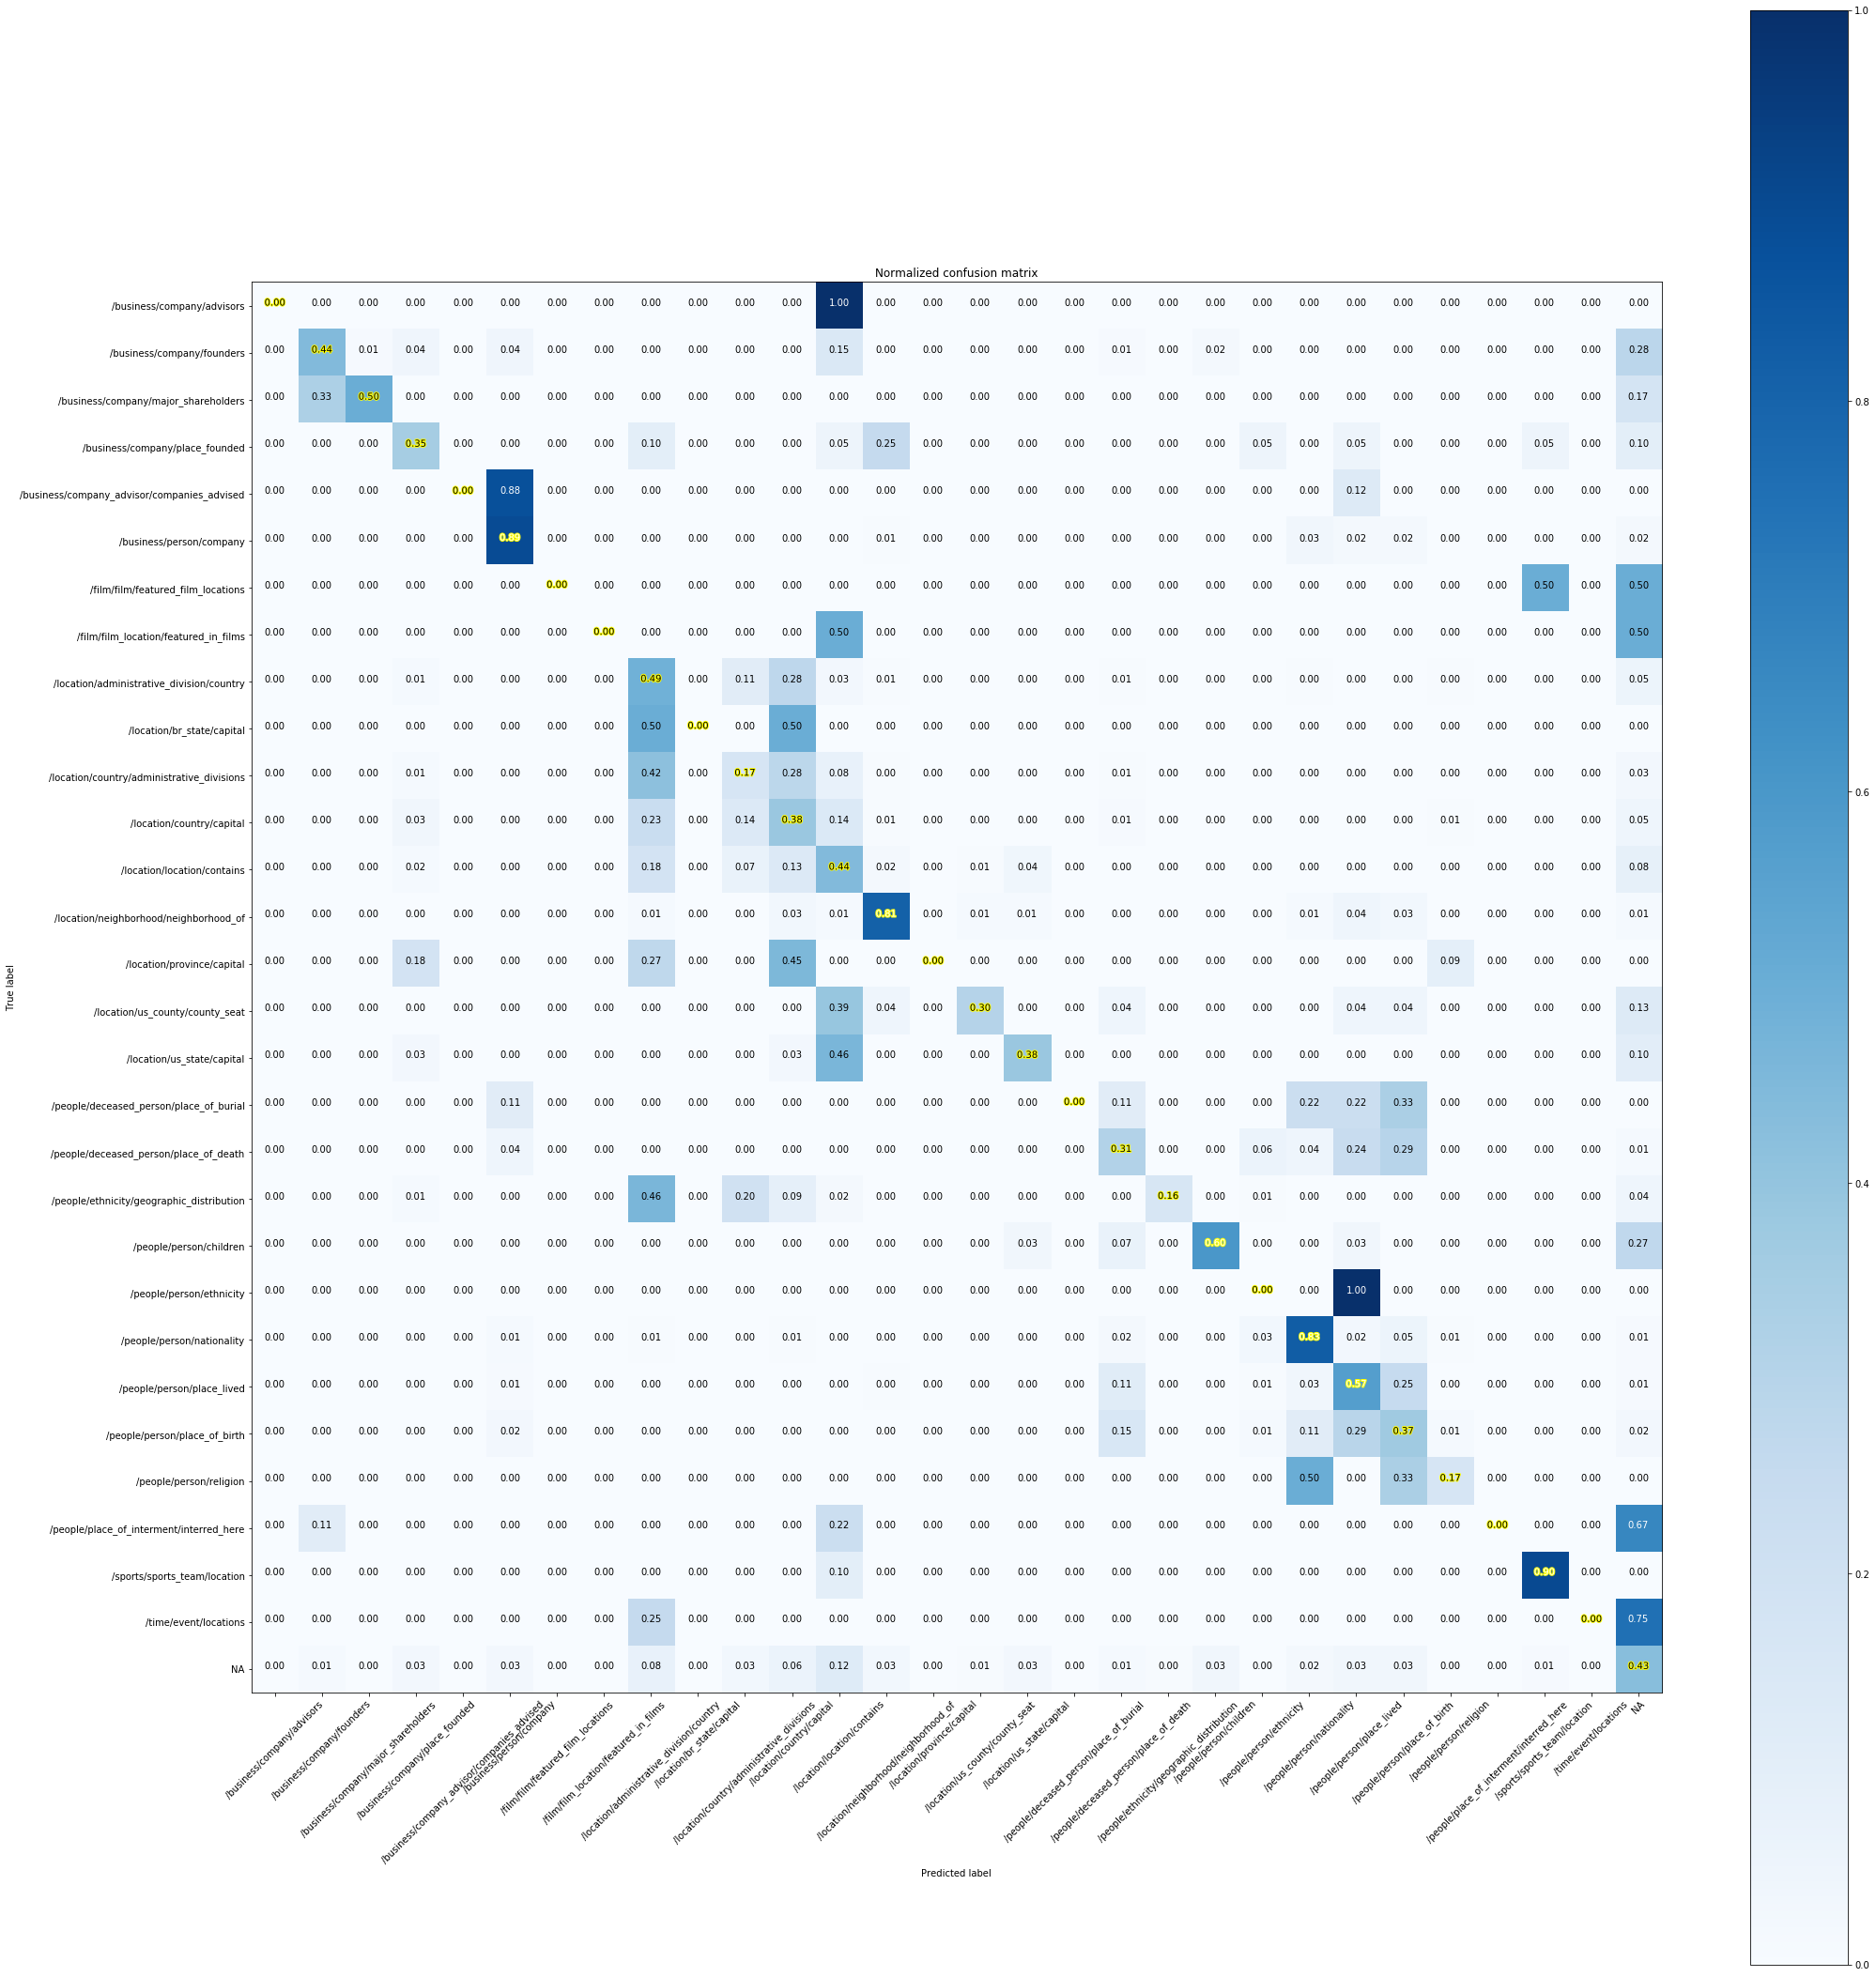

In [42]:
plt.rcParams["figure.figsize"] = (30, 30)

# Plot non-normalized confusion matrix
visualization.plot_confusion_matrix(cnf_matrix,
                      classes=classes,
                      title='Confusion matrix, without normalization').show()

# Plot normalized confusion matrix
visualization.plot_confusion_matrix(cnf_matrix, classes=classes, normalize=True,
                      title='Normalized confusion matrix').show()

In [138]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13935034082298993415
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 3997827162524441191
physical_device_desc: "device: XLA_CPU device"
]
